<a href="https://colab.research.google.com/github/salmaelgd/project_nlp/blob/main/analyse_tendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

analyse_trend

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data exporting and giving a name to each column
file_path = '/content/drive/MyDrive/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)
df.columns = ['sentiment', 'ids', 'date', 'flag', 'user', 'text']


In [4]:
data = df['text']

In [5]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data)

In [6]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
topics = lda.fit_transform(X)

In [7]:
feature_names = vectorizer.get_feature_names_out()

for i, topic in enumerate(lda.components_):
    print(f"Topic #{i+1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print("\n")


Topic #1:
['wow', 'tonight', 'looking', 'just', 'thank', 'happy', 'sad', 'great', 'love', 'day']


Topic #2:
['today', 'days', 'bed', 'school', 'got', 'night', 'tomorrow', 'home', 'going', 'just']


Topic #3:
['birthday', 'sure', 'cool', 'sick', 'need', 'haha', 'wish', 'feel', 'thanks', 'like']


Topic #4:
['hair', 'cute', 'check', 'www', 'hot', 'nice', 'look', 'twitpic', 'com', 'http']


Topic #5:
['sleep', 'need', 'yeah', 'don', 'new', 'today', 'want', 'got', 'really', 'work']


Topic #6:
['man', 'better', 'soon', 'watching', 'lt', 'hey', 'sorry', 'hope', 'oh', 'good']


Topic #7:
['like', 'making', 'friend', 'lost', 'old', 'yes', 'miss', 'twitter', 'lol', 'quot']


Topic #8:
['bad', 'ready', 'http', 'ly', 'day', 'good', 'come', 'getting', 'bit', 'morning']


Topic #9:
['let', 'don', 'didn', 'wait', 'll', 'fun', 'think', 'im', 'amp', 'know']


Topic #10:
['hate', 'tweet', 'yay', 'work', 'working', 'long', 'day', 'gonna', 'week', 'time']




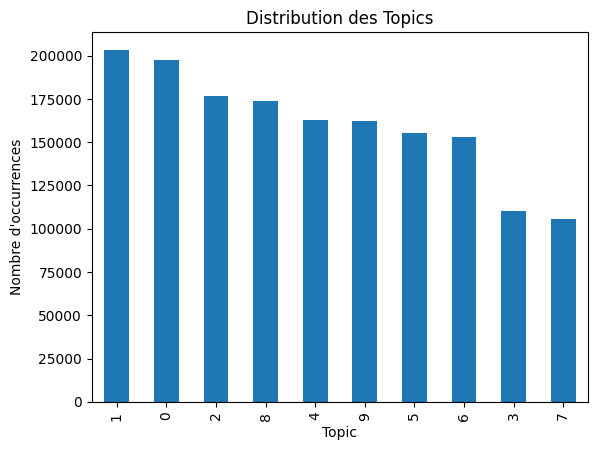

In [8]:
df['topic'] = topics.argmax(axis=1)

topic_counts = df['topic'].value_counts()
topic_counts.plot(kind='bar', title='Distribution des Topics')
plt.xlabel('Topic')
plt.ylabel('Nombre d\'occurrences')
plt.show()

In [10]:
tweets_per_topic = 5

for i in range(lda.n_components):
    topic_tweets = df[df['topic'] == i]['text'].head(tweets_per_topic).tolist()

    print(f"Topic #{i+1} - Sample Tweets:")
    for j, tweet in enumerate(topic_tweets):
        print(f"  Tweet {j+1}: {tweet}")
    print("\n")

Topic #1 - Sample Tweets:
  Tweet 1: @Kwesidei not the whole crew 
  Tweet 2: @twittera que me muera ? 
  Tweet 3: @caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .
  Tweet 4: about to file taxes 
  Tweet 5: Sad, sad, sad. I don't know why but I hate this feeling  I wanna sleep and I still can't!


Topic #2 - Sample Tweets:
  Tweet 1: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
  Tweet 2: @Tatiana_K nope they didn't have it 
  Tweet 3: I just re-pierced my ears 
  Tweet 4: blagh class at 8 tomorrow 
  Tweet 5: I hate when I have to call and wake people up 


Topic #3 - Sample Tweets:
  Tweet 1: my whole body feels itchy and like its on fire 
  Tweet 2: Need a hug 
  Tweet 3: @angry_barista I baked you a cake but I ated it 
  Tweet 4: @cocomix04 ill tell ya the story later  not a good day and ill be workin for like three more hours...
  Tweet 5: Just checked my user timeline on my blackberry, it l

In [9]:
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud


<ipython-input-11-9a36260de3a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  topic_correlation = df.corr()


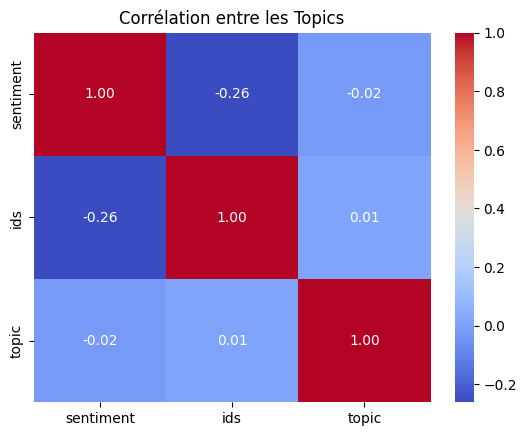

In [11]:
topic_correlation = df.corr()
sns.heatmap(topic_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélation entre les Topics')
plt.show()


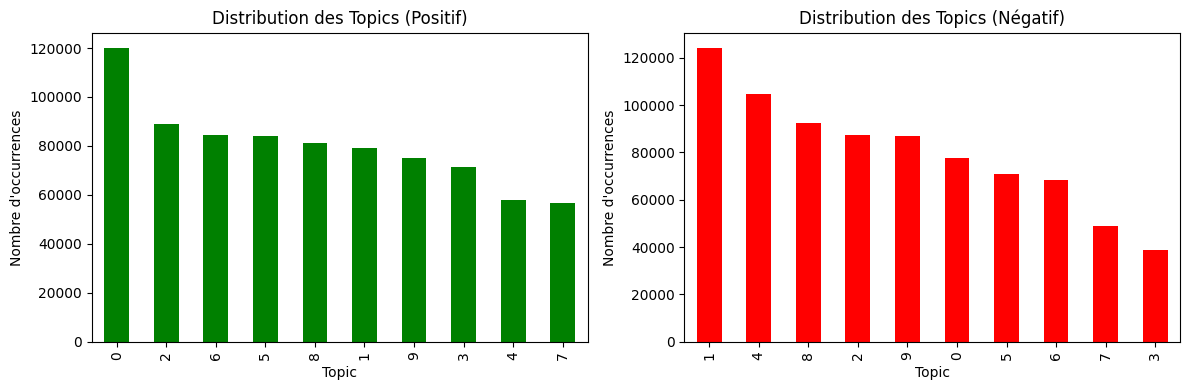

In [13]:
# Analyse des topics par classe (positif/négatif)
positive_topics = df[df['sentiment'] == 4]['topic']
negative_topics = df[df['sentiment'] == 0]['topic']

positive_topic_counts = positive_topics.value_counts()
negative_topic_counts = negative_topics.value_counts()

# Visualisation des tendances des topics par classe
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
positive_topic_counts.plot(kind='bar', ax=ax1, color='green', title='Distribution des Topics (Positif)')
negative_topic_counts.plot(kind='bar', ax=ax2, color='red', title='Distribution des Topics (Négatif)')
ax1.set_xlabel('Topic')
ax1.set_ylabel('Nombre d\'occurrences')
ax2.set_xlabel('Topic')
ax2.set_ylabel('Nombre d\'occurrences')
plt.tight_layout()
plt.show()

